 # Принятие решений в бизнесе (А/В тест)

### Загрузка и преобработка данных

In [1]:
# Загрузка библиотек

import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math as mth
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()


In [2]:
# Загрузка данных

try: 
    hypothesis = pd.read_csv('/Users/tumur/Downloads/hypothesis.csv')
    orders = pd.read_csv('/Users/tumur/Downloads/orders.csv')
    visitors = pd.read_csv('/Users/tumur/Downloads/visitors.csv')
except :
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    

#### Таблица Гипотезы

In [3]:
# Выводим полнуб длинну столбца,чтобы выдеть гипотезы
pd.options.display.max_colwidth = 1

# Информация про столбцы
hypothesis.info() 

# Заголовок таблицы визиты 
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
# Преобразование таблицы

# Приведем названия столбцов к синтаксическим правилам 
hypothesis = (hypothesis.rename(columns  = {'Hypothesis' : 'hypothesis' , 
                                   'Reach' : 'reach' ,
                                   'Impact' : 'impact',
                                   'Confidence' : 'confidence',
                                   'Efforts' : 'efforts' }))

# Проверим  наличие дублирующихся записей
hypothesis.duplicated().sum()

0

#### Таблица Заказы

In [5]:
# Информация про столбцы
orders.info() 

# Заголовок таблицы визиты 
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# Проверим  наличие дублирующихся записей
orders.duplicated().sum()

0

In [7]:
# Приводим столбец к корректному формату
orders['date'] = pd.to_datetime(orders['date'], format ='%Y-%m-%d')

#### Таблица Посетители

In [8]:
# Информация про столбцы
visitors.info() 

# Заголовок таблицы визиты 
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# Приводим столбец к корректному формату

visitors['date'] = pd.to_datetime(visitors['date'], format ='%Y-%m-%d')

In [10]:
# Сравниваме временные периоды в таблицах

print(orders['date'].min() , orders['date'].max() )
print(visitors ['date'].min(), visitors ['date'].max() )

2019-08-01 00:00:00 2019-08-31 00:00:00
2019-08-01 00:00:00 2019-08-31 00:00:00


### Вывод по Загрузке и  Преобработке данных

Исходные данные проекта были представлены в 3 таблицах. 

- В процессе загрузки и проверки данных в таблицах дубликатов и пропусков не обнаруженно.
- Назваиния столбцов приведенны к общепринятому формату, transactionId и visitorId -оставил в исходном виде, их так удобнее считать.
- Были проверенны типы данных столбцов и приведены к соответствию с содержанрием данных.
- Временные рамки указанные в таблицах Заказы (orders) и Посетители (visitors) соотствуют друг другу

Ввводные данные готовы к дальнейшей работе в рамках проекта

## Часть 1. Приоритизация гипотез.

- [x] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [11]:
# Расчитываем показатель приоретизации гипотес методом ICE
hypothesis['ice'] = round ( (hypothesis['impact']*hypothesis['confidence'] / hypothesis['efforts']),2)

# Сортируем столбцы по показателю ICE
hypothesis.sort_values(by = 'ice', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [12]:
hypothesis['rice'] = round ( (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'] / hypothesis['efforts']),2)

hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод Приоретизация гипотез

При расчете гипотез методом RICE в числе наиболее приоритеных оказались иные гипотезы нежели при расчете фреймворком ICE. Отличие расчет фреймворков заключается в учете показателя Reach, которыйотражает, скольких пользователей затронет изменение, которое вы хотите внести. Если объем собранных данных содержит информацию по Reach,то при выборе фреймворка, конечно, стоит одать предпочтения приритетам основанным на фреймворке RICE.

Гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" входит в топ-3 при расчете ICE and RICE ее стоит приоретизировать.

## Проверка данных к А/В тесту

In [13]:
print('Общее количество посетителей:', orders['visitorId'].nunique())
print('количество посетителей в группе А:', orders.query('group == "A"')['visitorId'].nunique())
print('количество посетителей в группе В:', orders.query('group == "B"')['visitorId'].nunique())

Общее количество посетителей: 1031
количество посетителей в группе А: 503
количество посетителей в группе В: 586


In [14]:
#выборка пользователей, попавших в обе выборки

dupl_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
dupl_users.columns = ['groups', 'group_names']
dupl_users = dupl_users.query('groups > 1')
print (dupl_users.head())
print ('Число посетителей дублирующихся в обеих группах:' , len(dupl_users))


           groups group_names
visitorId                    
8300375    2       [B, A]    
199603092  2       [A, B]    
232979603  2       [B, A]    
237748145  2       [B, A]    
276558944  2       [B, A]    
Число посетителей дублирующихся в обеих группах: 58


### Вывод Првоерка данных к А/В тесту

- Общее число пользователей 1031.
- Группы по численности сопостативыми 503 и 586
- Число дублирующихся пользователей составляет 58 (5% от общей выборки и приблезительно по 10% в отдельной группе)

Принято решение не удалять дубрирующие значения


## Часть 2. Анализ A/B-теста (блок 1)


- [x] Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


### 1.  Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


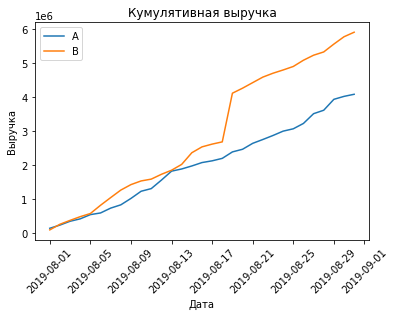

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка')
plt.xticks(rotation = 45)

None

### Промежуточный Вывод

Выручка в обеих группах растет на протяжении анализируемого периода, однако показатели группы В после 2019-08-17, совершают значительный скачек, что может быть вызванно увеличением числа заказов или же увеличинием средней стоимости отдельных заказов

### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

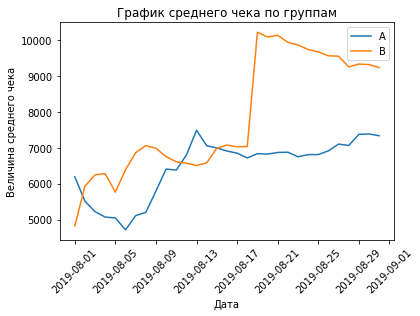

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Величина среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График среднего чека по группам')
None

### Промежуточный Вывод

Рассматривая динамику кумулятивного среднего чека по группам, видим рост среднего чека к концу преиода в каждой из групп. Однако динамика изменения среднего чека у групп сильно разнится. У группы В стремительный рост после 2019-08-17 и постепенный выход на плато до конца периода. У группы А рост с 2019-08-05 и выход на плато до конца периода

### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

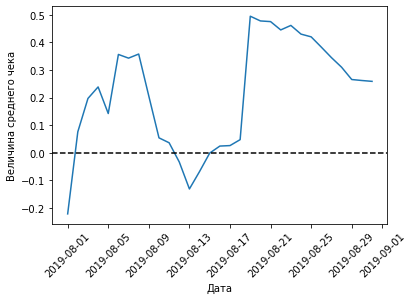

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Величина среднего чека')
plt.xlabel('Дата')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
None

### Промежуточный Вывод

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

### 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

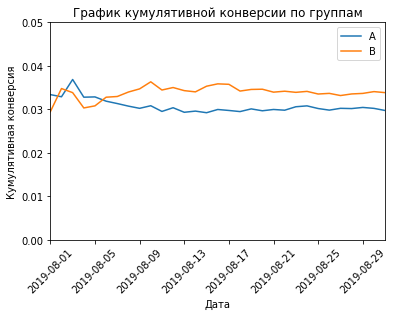

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')


# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation = 45)
None

### Промежуточный Вывод

Получившийся график имеет тенденцию к симметричности. Группы колебались около одного значения, но затем конверсия группы A вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась.


### 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

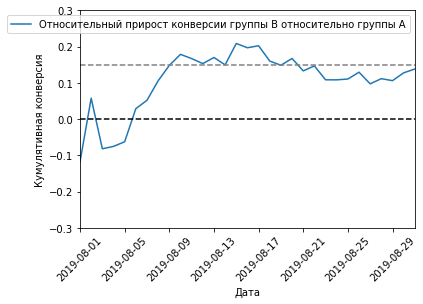

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.xticks(rotation = 45)
None

### Промежуточный Вывод

В начале теста группа В равнялась группе А, однакопосле 2019-08-05 гркппа В значительно выросла и совершив отскок зафиксирвоалась на значениях 0.2 - 0.1. (отразил серым пунктиром)

## Часть 2. Анализ A/B-теста (блок 2)


- [x] Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 



       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


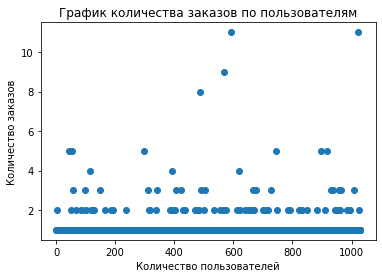

In [22]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('График количества заказов по пользователям')

None

### Промежуточный Вывод

График количество заказов по пользователям отражает весьма ожидаеимую картину, большенство посетителей совершают одну покупку. Занчительно меньшее число совершают 2-3 покупки. Значения более 4+ покупок уже являются аномально редкими и составлят не более 10% от общего числа покупок

### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))

print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

# Аномлаьно число заказов (чтобы использвоать в формулах дальше)
anom_zac = (np.percentile(ordersByUsers['orders'], 95))

95 перцентиль: 2.00
99 перцентиль: 4.00


### Промежуточный Вывод

Получив значения перценталий, можем заключит,что не более 5% пользователей совершали покупку 2 раза и не более 1% пользоватлей совершили 4 покупки и более.

Границей для определения аномальных пользоватлей установлена на отметке в 5% пользваотелей 2 товара+

### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

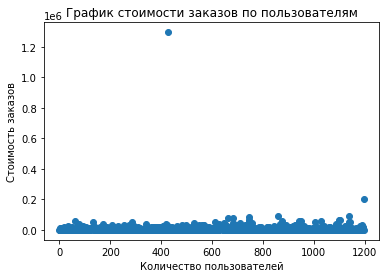

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.title('График стоимости заказов по пользователям')
None

### Промежуточный Вывод

В рамках построенного графика видим, что значительная доля заказов находится в промежутке от 0.0 до 0.2. Число заказов превышающих эти показатели весьма незначительно.

### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))

print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))


# Аномлаьное число заказов (чтобы использвоать в формулах дальше)
anom_sum = (np.percentile(orders['revenue'], 95))
print(anom_sum)

95 перцентиль: 28000.00
99 перцентиль: 58233.20
28000.000000000004


### Промежуточный Вывод

Процентали отражают, что не более 5% пользоватлей совершили покупки на сумму 28000 и более. И не более 1% пользователей совершили покупки на сумму 58233 и более

Граница опредления аномальной стоимости заказа установлена на пороге 5% плользоватлей (28 000)

## Часть 2. Анализ A/B-теста (блок 3)

- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.


###  10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [26]:
visitorsADaily = visitors[visitors['group'] =='A'][['date', 'visitors']]
visitorsADaily.columns = ['date' , 'visitoresPerDateA']

visitorsBDaily = visitors[visitors['group'] =='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date' , 'visitoresPerDateB']

ordersByUsersA = ( orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index = False)
                  .agg({'transactionId': pd.Series.nunique})
                 )
ordersByUsersA.columns = ['visitorId','orders']


ordersByUsersB = ( orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index = False)
                  .agg({'transactionId': pd.Series.nunique})
                 )
ordersByUsersB.columns = ['visitorId','orders']

SampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(
         0,
         index = np.arange(
             visitorsADaily['visitoresPerDateA'].sum() - len(ordersByUsersA['orders'])),
         name = 'orders',
     ),
    ],
    axis = 0,
)

SampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(
         0,
         index = np.arange(
             visitorsBDaily['visitoresPerDateB'].sum() - len(ordersByUsersB['orders'])),
         name = 'orders',
     ),
    ],
    axis = 0,
)


In [27]:
print ('p-value "сырые данные":' , '{0:.5f}'.format(stats.mannwhitneyu(SampleA,SampleB)[1]))
print('Относительный прирост колличества заказов группы В "сырые данные":' , '{0:.3f}'.format(SampleB.mean()/ SampleA.mean() - 1))

p-value "сырые данные": 0.01679
Относительный прирост колличества заказов группы В "сырые данные": 0.138


### Промежуточный Вывод


    Н0 : статистически значимых различий в среднем числе заказов между группами нет
    Н1 : статистически значимых различий в среднем числе заказов между группами есть

P-value = 0,01679 - меньше 0.05 -ошибки первого рода, что в свою очередь значит,что нулевую гипотезу ( H0: статистических различий в среднем числезаказов между группами нет) - отвергаем!
Прирост 0.138 (14%) -относительный прирост среднего колличества заказов группы В к группе А



### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [28]:
print('p-value "сырые данные" :', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print( 'Относительный прирост среднего чека группы В "сырые данные":','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value "сырые данные" : 0.729
Относительный прирост среднего чека группы В "сырые данные": 0.259


### Промежуточный Вывод

    Н0: различий в среднем чеке между группами нет.
    Н1: различия в среднем чеке между группами есть


Р-value = 0.729 значительно больше 0.05. Не удается отвергнуть нулевую гипотезу (Н0: различий в среднем чеке между группами нет. Средний чек группы B выше среднего чека группы A на 26%.

### 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Вспомним, что 95-й и 99-й перцентили стоимости заказов равны:

    95 перцентиль : 28000.00 
    99 перцентиль : 58233.20

А 95-й и 99-й перцентили количества заказов на пользователя равны: 

    95 перцентиль : 2.00
    99 перцентиль : 4.00

Примите за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 28 000 рублей.

Так мы уберёте 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Удалять нужно именно пользователей — сначала определить аномальные заказы. Затем пользователей, совершивших их, и добавить их в список аномальных. 

In [29]:

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > anom_zac]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > anom_zac]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > anom_sum]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print ( 'Число аномальных пользователей:' , len(abnormalUsers))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
Число аномальных пользователей: 74


In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitoresPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitoresPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [31]:
print('p-value "очищенные данные":','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост колличества заказов группы В группы В "очищенные данные":','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value "очищенные данные": 0.01304
Относительный прирост колличества заказов группы В группы В "очищенные данные": 0.173


### Промежуточный Вывод

    Н0 : статистически значимых различий в среднем числе заказов между группами нет
    Н1 : статистически значимых различий в среднем числе заказов между группами есть

P-value = 0,01304 - меньше 0.05 -ошибки первого рода, что в свою очередь значит,что нулевую гипотезу ( H0: статистических различий в среднем числезаказов между группами нет) - отвергаем!. Как и в случе с "сырыми данными", тогда p-value составило 0,01679. После очистки данных решение по гипотезе не изменилось. Гипотезу отвергаем!

    p-value по сырым данным - 0,01679
    p-value по очищенным данным - 0,01304


### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu()
# данные о выручке с заказов. 
# А ещё найдём относительные различия в среднем чеке между группами:

print('p-value "очищенные данные":',
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы В "очищенные данные":',
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value "очищенные данные": 0.73848
Относительный прирост среднего чека группы В "очищенные данные": -0.01962


### Промежуточный Вывод

    Н0 : статистически значимых различий в среднем чеке заказа между группами нет
    Н1 : статистически значимые различия в среднем чеке заказа между группами есть

P-value = 0,738-  значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B незначительно ниже среднего чека группы A (на 2%). Решение по H0 гипотезе не изменилось. отвергнуть не можем!

    p-value по сырым данным - 0,729
    p-value по очищенным данным - 0,738

### 14. Примите решение по результатам теста и объясните его.

- Часть 1

 При расчете гипотез методом RICE в числе наиболее приоритеных оказались иные гипотезы нежели при расчете фреймворком ICE. Отличие расчет фреймворков заключается в учете показателя Reach, которыйотражает, скольких пользователей затронет изменение, которое вы хотите внести. Если объем собранных данных содержит информацию по Reach,то при выборе фреймворка, конечно, стоит одать предпочтения приритетам основанным на фреймворке RICE.

Гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" входит в топ-3 при расчете ICE and RICE ее стоит приоретизировать.

--------
- Часть 2 (блок 1)


    1.  Кумулятивная выручка группы В во второй половине периода значительно выше выручки группы А. можно наблюдать мы значительный скачек 2019-08-19
    2. График среднего чека по группам также отражет значительно превосходство группы В, особенно во второй половине рассматриваемого периода.
    3. График кумулятивной конверсии по группам имеет тенденцию к симметричности. Группы колебались около одного значения, но затем конверсия группы A вырвалась вперёд и зафиксировалась, а конверсия группы B просела и также зафиксировалась.
    4. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A в начале теста группа В равнялась группе А, однакопосле 2019-08-05 гркппа В значительно выросла и совершив отскок зафиксирвоалась на значениях 0.2 - 0.1.
        
- Часть 2 (блок 2)

    1. График количество заказов по пользователям отражает весьма ожидаеимую картину, большенство посетителей совершают одну покупку. Занчительно меньшее число совершают 2-3 покупки. Значения более 4+ покупок уже являются аномально редкими и составлят не более 10% от общего числа покупок.
    2. Точечный график стоимостей заказов отражает, что значительная доля заказов находится в промежутке от 0.0 до 0.2.(до 200 тыс.вал.) Число заказов превышающих эти показатели весьма незначительно. 

- Часть 2(3 блок)
    1. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. P-value = 0,01679 - меньше 0.05 -ошибки первого рода, что в свою очередь значит,что нулевую гипотезу ( H0: статистических различий в среднем числезаказов между группами нет) - отвергаем! Прирост 0.138 (14%) -относительный прирост среднего колличества заказов группы В к группе А
    2.  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Р-value = 0.729 значительно больше 0.05. Не удается отвергнуть нулевую гипотезу (Н0: различий в среднем чеке между группами нет. Средний чек группы B выше среднего чека группы A на 26%.
    3. Cтатистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным P-value = 0,01304 - меньше 0.05 -ошибки первого рода, что в свою очередь значит,что нулевую гипотезу ( H0: статистических различий в среднем числезаказов между группами нет) - отвергаем!. Как и в случе с "сырыми данными", тогда p-value составило 0,01679. После очистки данных решение по гипотезе не изменилось.
    4. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным P-value = 0,738-  значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B незначительно ниже среднего чека группы A (на 2%). Решение по H0 гипотезе не изменилось. отвергнуть не можем!

-----
- По результатам теста принято решение об остановке теста и признания его успешным. Зафиксировать малое различе по сумме среднего чека различий между группами по сумме среднего чека и победу группы В, и значительно различе в пользу группы В по числу зуказов на посетителя в +17% по очищенным данным. Графики конверсии отражают получивший рузультат.